In [1]:
#[DATA DESCRIPTION]
#age - age in years
#sex - (1 = male; 0 = female)
#chestpain - chest pain type
#restbps - resting blood pressure (in mm Hg on admission to the hospital)
#cholestrol - serum cholestoral in mg/dl
#fastingbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#maxheartrate - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thalassemia - 3 = normal; 6 = fixed defect; 7 = reversable defect
#target - have disease or not (1=yes, 0=no)
#heart_disease-have heart disease or not(0=yes, 1=no)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
import statsmodels.api as sm
from sklearn import feature_selection
from sklearn import ensemble
from sklearn import neighbors
from sklearn import naive_bayes

In [3]:
df=pd.read_csv("C:/Users/pratyasha das/Documents/PythonProjectsPD/DATASETS/heart_disease_data.csv")
df.head()

,age,sex,chestpain,restbps,cholestrol,fastingbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thalassemia,target,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [4]:
cols=["age","sex","cp","rbps","chol","fbs","recg","maxhr","exang","oldpeak","slope","ca","thal","target","hd"]
df.columns=cols

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   rbps     303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   recg     303 non-null    int64  
 7   maxhr    303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  target   303 non-null    int64  
 14  hd       303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df.hd.value_counts()

0    165
1    138
Name: hd, dtype: int64

In [8]:
df.describe()

,age,sex,cp,rbps,chol,fbs,recg,maxhr,exang,oldpeak,slope,ca,thal,target,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.455446
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


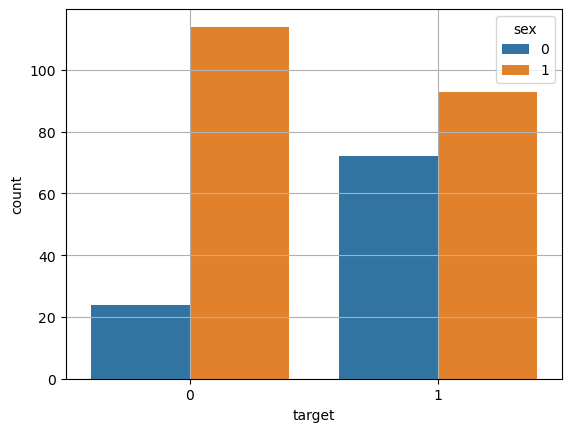

In [9]:
sns.countplot(x="target",hue="sex",data=df)
plt.grid(True)
#Has Heart disease-More men have heart disease compared to women
#Doesnot have Heart Disease-% of men> 

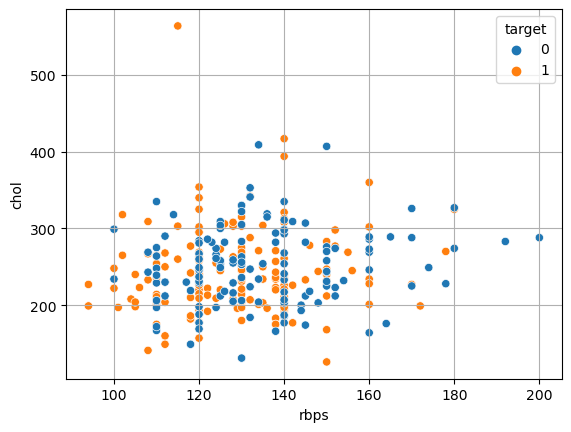

In [10]:
sns.scatterplot(x="rbps",y="chol",hue="target",data=df)
plt.grid(True)

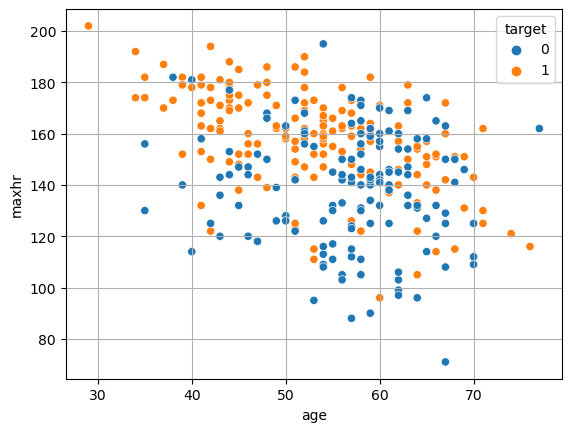

In [11]:
sns.scatterplot(x="age",y="maxhr",hue="target",data=df)
plt.grid(True)

In [12]:
df.cp.value_counts()#discrete

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [13]:
df.recg.value_counts()#discrete

1    152
0    147
2      4
Name: recg, dtype: int64

In [14]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

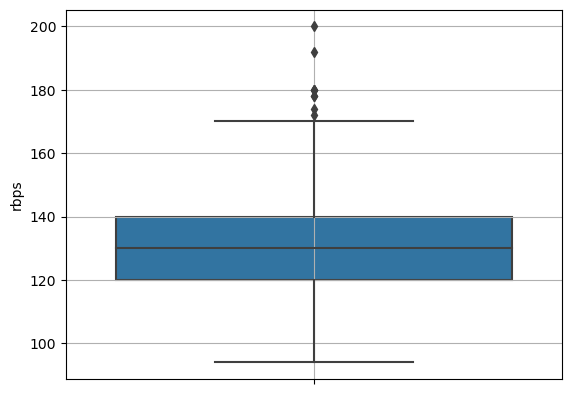

In [15]:
sns.boxplot(y="rbps",data=df)
plt.grid(True)#outliers

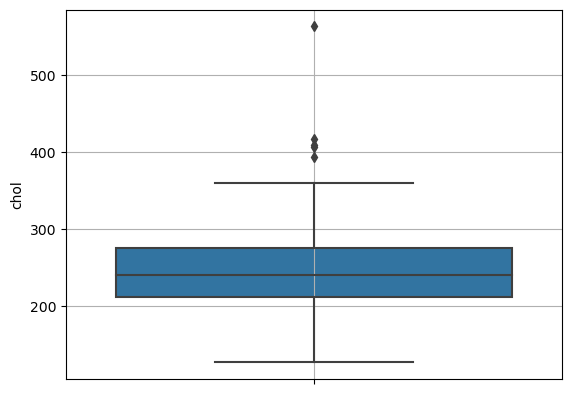

In [16]:
sns.boxplot(y="chol",data=df)
plt.grid(True)#outliers

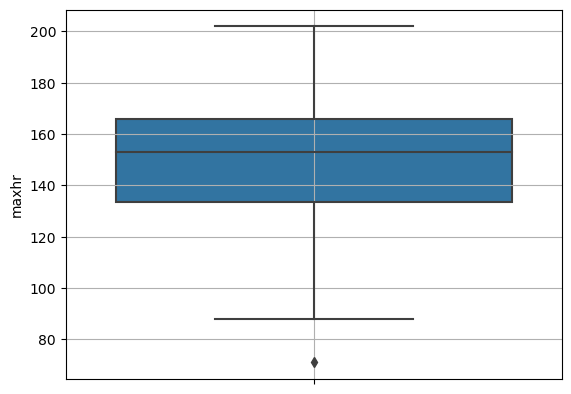

In [17]:
sns.boxplot(y="maxhr",data=df)
plt.grid(True)#can be considered

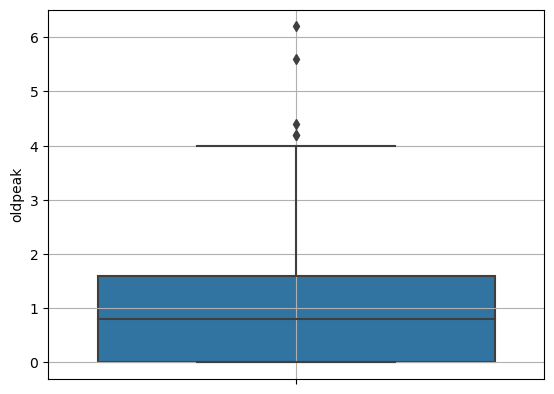

In [18]:
sns.boxplot(y="oldpeak",data=df)
plt.grid(True)#outliers

In [19]:
df.drop("hd",axis=1,inplace=True)
df.head()

,age,sex,cp,rbps,chol,fbs,recg,maxhr,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#One Hot Encoding of Discrete sets-Creating Dummy variables

In [21]:
dfohe=pd.get_dummies(df ,drop_first=True,columns=['sex','cp','fbs','recg','exang','slope','ca','thal'])#first columns dropped
dfohe.head()

,age,rbps,chol,maxhr,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


<h4> Dividing data to train and test

In [22]:
X=dfohe.drop('target',axis=1)
y=dfohe['target']

In [23]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=42)

In [24]:
Xtrain.shape

(257, 22)

In [25]:
Xtest.shape

(46, 22)

<h4> Scaling

In [26]:
contcol=['age','rbps','chol','maxhr','oldpeak']#continuous column list

scaler=preprocessing.StandardScaler()#class object created
scaler.fit(Xtrain[contcol]) #calculates mean and sd for all the cont columns one at a time
Xtrain[contcol]=scaler.transform(Xtrain[contcol])
Xtest[contcol]=scaler.transform(Xtest[contcol])

In [27]:
Xtrain[:3]

,age,rbps,chol,maxhr,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
281,-0.275121,-0.170154,-0.813424,0.267828,-0.033030,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
78,-0.275121,-0.170154,-0.794331,1.545870,-0.899233,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
292,0.383631,2.315151,-0.412470,-0.188616,1.526135,0,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0


In [28]:
recalls={}

<h4>LOGISTIC REGRESSION

In [29]:
#Base Model
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)
print("TRAINING METRICS")
print("==================")
print("RMSE",np.sqrt(metrics.mean_squared_error(ytrain,predtrain)))
print("R.SQUARED",metrics.r2_score(ytest,predtest))
print("TEST METRICS")
print("==================")
print("RMSE",np.sqrt(metrics.mean_squared_error(ytest,predtest)))
print("R.SQUARED",metrics.r2_score(ytrain,predtrain))

TRAINING METRICS
RMSE 0.35833597260211036
R.SQUARED 0.45238095238095255
TEST METRICS
RMSE 0.3611575592573076
R.SQUARED 0.4841240875912409


In [30]:
def printscores(act,pred):
    print("accuracy :",metrics.accuracy_score(act,pred)*100,"%")
    print("recall :",metrics.recall_score(act,pred)*100,"%")
    print("precision :",metrics.precision_score(act,pred)*100,"%")
    print("f1 :",metrics.f1_score(act,pred)*100,"%")
    print("AUC :",metrics.roc_auc_score(act,pred)*100,"%")

In [31]:
print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)
r=metrics.recall_score(ytrain,predtrain)*100
recalls['Logistic Regression'] = r

TRAINING MERICS:
accuracy : 87.15953307392996 %
recall : 89.78102189781022 %
precision : 86.61971830985915 %
f1 : 88.17204301075269 %
AUC : 86.97384428223843 %
TEST METRICS:
accuracy : 86.95652173913044 %
recall : 85.71428571428571 %
precision : 92.3076923076923 %
f1 : 88.8888888888889 %
AUC : 87.3015873015873 %


<h4> RFE for feature selection

In [32]:
model=ensemble.RandomForestClassifier(random_state=42,n_estimators=100,n_jobs=-1)
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=17) 
rfeobj.fit(Xtrain,ytrain)
print("SIGNIFICANT COLUMNS :",Xtrain.columns[rfeobj.support_])
arr=rfeobj.transform(Xtrain)

Xtrain1=pd.DataFrame(arr,columns=Xtrain.columns[rfeobj.support_],index=Xtrain.index)
Xtest1=pd.DataFrame(rfeobj.transform(Xtest),columns=Xtest.columns[rfeobj.support_],index=Xtest.index)

SIGNIFICANT COLUMNS : Index(['age', 'rbps', 'chol', 'maxhr', 'oldpeak', 'sex_1', 'cp_1', 'cp_2',
       'recg_1', 'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3',
       'thal_2', 'thal_3'],
      dtype='object')


In [33]:
Xtrain1[:5]

,age,rbps,chol,maxhr,oldpeak,sex_1,cp_1,cp_2,recg_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
281,-0.275121,-0.170154,-0.813424,0.267828,-0.033030,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
78,-0.275121,-0.170154,-0.794331,1.545870,-0.899233,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
292,0.383631,2.315151,-0.412470,-0.188616,1.526135,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
232,0.054255,1.723412,0.809487,-0.234260,-0.206271,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
219,-0.714288,-0.051806,0.179415,-0.006039,-0.899233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [34]:
#New Model
model.fit(Xtrain1,ytrain)
predtrain=model.predict(Xtrain1)
predtest=model.predict(Xtest1)
print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)

TRAINING MERICS:
accuracy : 100.0 %
recall : 100.0 %
precision : 100.0 %
f1 : 100.0 %
AUC : 100.0 %
TEST METRICS:
accuracy : 82.6086956521739 %
recall : 82.14285714285714 %
precision : 88.46153846153845 %
f1 : 85.18518518518519 %
AUC : 82.73809523809523 %


<h4> DECISION TREE

In [35]:
#Base Model
model=tree.DecisionTreeClassifier(random_state=42)
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)
r=metrics.recall_score(ytrain,predtrain)*100
recalls['Decison Tree'] = r

TRAINING MERICS:
accuracy : 100.0 %
recall : 100.0 %
precision : 100.0 %
f1 : 100.0 %
AUC : 100.0 %
TEST METRICS:
accuracy : 76.08695652173914 %
recall : 71.42857142857143 %
precision : 86.95652173913044 %
f1 : 78.43137254901961 %
AUC : 77.3809523809524 %


In [36]:
pd.Series(model.feature_importances_,index=Xtrain.columns).sort_values(ascending=False)

thal_2     0.281229
oldpeak    0.192027
chol       0.115331
maxhr      0.081699
rbps       0.059334
age        0.047518
exang_1    0.036634
ca_1       0.028774
cp_3       0.026986
sex_1      0.026427
cp_2       0.022845
ca_2       0.019959
slope_1    0.018960
ca_3       0.016339
cp_1       0.013027
recg_1     0.007816
thal_3     0.005095
slope_2    0.000000
ca_4       0.000000
thal_1     0.000000
fbs_1      0.000000
recg_2     0.000000
dtype: float64

In [37]:
#New Model
grid={ "max_depth":[6,7,8],"min_samples_split":[30,40,50] }  
model=tree.DecisionTreeClassifier(random_state=42)
gobj=model_selection.GridSearchCV(estimator=model,param_grid=grid,cv=5,scoring="recall",n_jobs=-1,return_train_score=True)
gobj.fit(Xtrain1,ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8],
                         'min_samples_split': [30, 40, 50]},
             return_train_score=True, scoring='recall')

In [38]:
print(gobj.best_params_)

{'max_depth': 6, 'min_samples_split': 50}


In [39]:
griddf=pd.DataFrame(gobj.cv_results_)
griddf[["params","mean_train_score","mean_test_score"]]

,params,mean_train_score,mean_test_score
0,"{'max_depth': 6, 'min_samples_split': 30}",0.830309,0.743915
1,"{'max_depth': 6, 'min_samples_split': 40}",0.823036,0.751323
2,"{'max_depth': 6, 'min_samples_split': 50}",0.816047,0.757407
3,"{'max_depth': 7, 'min_samples_split': 30}",0.830309,0.743915
4,"{'max_depth': 7, 'min_samples_split': 40}",0.823036,0.751323
5,"{'max_depth': 7, 'min_samples_split': 50}",0.816047,0.757407
6,"{'max_depth': 8, 'min_samples_split': 30}",0.830309,0.743915
7,"{'max_depth': 8, 'min_samples_split': 40}",0.823036,0.751323
8,"{'max_depth': 8, 'min_samples_split': 50}",0.816047,0.757407


In [40]:
bestmodel=gobj.best_estimator_ 
predtest=bestmodel.predict(Xtest1)
predtrain=bestmodel.predict(Xtrain1)

print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)

TRAINING MERICS:
accuracy : 79.76653696498055 %
recall : 90.51094890510949 %
precision : 76.07361963190185 %
f1 : 82.66666666666667 %
AUC : 79.00547445255475 %
TEST METRICS:
accuracy : 76.08695652173914 %
recall : 78.57142857142857 %
precision : 81.48148148148148 %
f1 : 80.0 %
AUC : 75.39682539682539 %


<h4> RANDOM FOREST

In [41]:
#Base Model
model=ensemble.RandomForestClassifier(random_state=42,n_estimators=500,n_jobs=-1)
model.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [42]:
predtest=model.predict(Xtest)
predtrain=model.predict(Xtrain)

print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)
r=metrics.recall_score(ytrain,predtrain)*100
recalls['Random Forest'] = r

TRAINING MERICS:
accuracy : 100.0 %
recall : 100.0 %
precision : 100.0 %
f1 : 100.0 %
AUC : 100.0 %
TEST METRICS:
accuracy : 80.43478260869566 %
recall : 78.57142857142857 %
precision : 88.0 %
f1 : 83.0188679245283 %
AUC : 80.95238095238095 %


<h4> Hyperparameter Tuning

In [43]:
grid={ "max_depth":[5,6,7],"min_samples_split":[90,100,110] }  
model=ensemble.RandomForestClassifier(random_state=42)
gobj=model_selection.GridSearchCV(estimator=model,param_grid=grid,cv=5,scoring="recall",n_jobs=-1,return_train_score=True)
gobj.fit(Xtrain1,ytrain)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [90, 100, 110]},
             return_train_score=True, scoring='recall')

In [44]:
print(gobj.best_params_)

{'max_depth': 5, 'min_samples_split': 110}


In [45]:
print(gobj.best_score_)

0.8248677248677249


In [46]:
griddf=pd.DataFrame(gobj.cv_results_)
griddf[["params","mean_train_score","mean_test_score"]]

,params,mean_train_score,mean_test_score
0,"{'max_depth': 5, 'min_samples_split': 90}",0.832093,0.817460
1,"{'max_depth': 5, 'min_samples_split': 100}",0.826656,0.817460
2,"{'max_depth': 5, 'min_samples_split': 110}",0.823003,0.824868
3,"{'max_depth': 6, 'min_samples_split': 90}",0.832093,0.817460
4,"{'max_depth': 6, 'min_samples_split': 100}",0.826656,0.817460
5,"{'max_depth': 6, 'min_samples_split': 110}",0.823003,0.824868
6,"{'max_depth': 7, 'min_samples_split': 90}",0.832093,0.817460
7,"{'max_depth': 7, 'min_samples_split': 100}",0.826656,0.817460
8,"{'max_depth': 7, 'min_samples_split': 110}",0.823003,0.824868


In [47]:
bestmodel=gobj.best_estimator_ 
predtest=bestmodel.predict(Xtest1)
predtrain=bestmodel.predict(Xtrain1)

print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)

TRAINING MERICS:
accuracy : 77.431906614786 %
recall : 81.75182481751825 %
precision : 77.24137931034483 %
f1 : 79.43262411347517 %
AUC : 77.12591240875912 %
TEST METRICS:
accuracy : 82.6086956521739 %
recall : 78.57142857142857 %
precision : 91.66666666666666 %
f1 : 84.61538461538461 %
AUC : 83.7301587301587 %


<h4> KNN 

In [48]:
import math
math.sqrt(len(ytest))

6.782329983125268

In [49]:
#Base Model
classifier=neighbors.KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')

In [50]:
classifier.fit(Xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [51]:
predtrain=classifier.predict(Xtrain)
predtest=classifier.predict(Xtest)

print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)
r=metrics.recall_score(ytrain,predtrain)*100
recalls['KNN'] = r

TRAINING MERICS:
accuracy : 84.43579766536965 %
recall : 86.86131386861314 %
precision : 84.39716312056737 %
f1 : 85.61151079136692 %
AUC : 84.2639902676399 %
TEST METRICS:
accuracy : 86.95652173913044 %
recall : 85.71428571428571 %
precision : 92.3076923076923 %
f1 : 88.8888888888889 %
AUC : 87.3015873015873 %


In [52]:
#New Model
classifier=neighbors.KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
classifier.fit(Xtrain1,ytrain)
predtrain=classifier.predict(Xtrain1)
predtest=classifier.predict(Xtest1)

In [53]:
print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)

TRAINING MERICS:
accuracy : 84.04669260700389 %
recall : 88.32116788321169 %
precision : 82.87671232876713 %
f1 : 85.51236749116607 %
AUC : 83.74391727493918 %
TEST METRICS:
accuracy : 84.78260869565217 %
recall : 82.14285714285714 %
precision : 92.0 %
f1 : 86.79245283018867 %
AUC : 85.515873015873 %


<h4> NAIVE BAYES

In [54]:
#Base Model
model=naive_bayes.GaussianNB()

In [55]:
model.fit(Xtrain,ytrain)

GaussianNB()

In [56]:
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)
print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)
r=metrics.recall_score(ytrain,predtrain)*100
recalls['Naive Bayes'] = r

TRAINING MERICS:
accuracy : 72.76264591439688 %
recall : 51.82481751824818 %
precision : 94.66666666666667 %
f1 : 66.98113207547169 %
AUC : 74.2457420924574 %
TEST METRICS:
accuracy : 56.52173913043478 %
recall : 35.714285714285715 %
precision : 83.33333333333334 %
f1 : 50.0 %
AUC : 62.301587301587304 %


In [57]:
#New Model
model.fit(Xtrain1,ytrain)
predtrain=model.predict(Xtrain1)
predtest=model.predict(Xtest1)
print("TRAINING MERICS:")
printscores(ytrain,predtrain)
print("==================")
print("TEST METRICS:")
printscores(ytest,predtest)

TRAINING MERICS:
accuracy : 84.8249027237354 %
recall : 83.94160583941606 %
precision : 87.12121212121212 %
f1 : 85.50185873605949 %
AUC : 84.88746958637469 %
TEST METRICS:
accuracy : 80.43478260869566 %
recall : 75.0 %
precision : 91.30434782608695 %
f1 : 82.35294117647058 %
AUC : 81.94444444444443 %


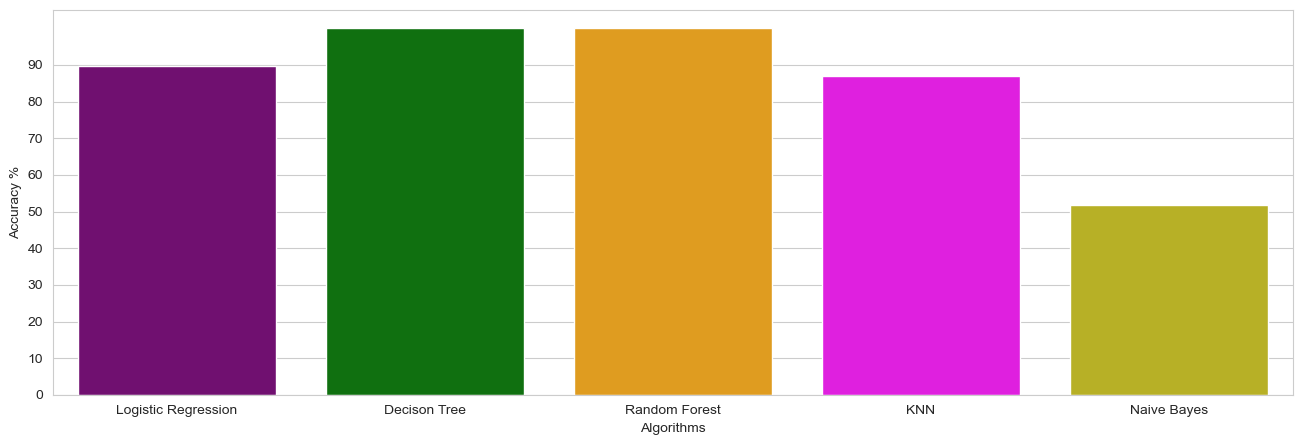

In [58]:
# MODEL COMAPRISON

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(recalls.keys()), y=list(recalls.values()), palette=colors)
plt.show()

<H3> RANDOM FOREST MODEL IS SELECTED AS IT IS A STABLE MODEL AND THE RECALL FOR TRAIN AND TEST IS CLOSEST.